#  Loan company - Logistic Regression

# 0.0 Context

Loan company is an online platform delivering customized loan products to salaried professionals and businessmen.The data science team at Loan company is building an underwriting layer to determine creditworthiness of MSMEs as well as individuals.This case study will focus on the underwriting process behind Personal Loan.

# 0.1 Problem Definition  
Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?

# 0.2 Data Problem
Here we need to build a model to predict probability if a credit line should be extended to customer. Since this we a classification problem we need to use Logistic regression model for doing prediction. We need  to  help Loan company understand important factors are important to determine if a credit line should be extended to customer and the repayment terms.


# 0.3 Column Profile
- 1.loan_amnt : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
- 2.term : The number of payments on the loan. Values are in months and can be either 36 or 60.
- 3.int_rate : Interest Rate on the loan  
- 4.installment : monthly payment owed by the borrower if the loan originates.  
- 5.grade : Loan company assigned loan grade   
- 6.sub_grade : Loan company assigned loan subgrade   
- 7.emp_title :The job title supplied by the Borrower when applying for the loan.*  
- 8.emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.  
- 9.home_ownership : The home ownership status provided by the borrower during registration or obtained from the credit report.  
- 10.annual_inc : The self-reported annual income provided by the borrower during registration.  
- 11.verification_status : Indicates if income was verified by Loan company, not verified, or if the income source was verified  
- 12.issue_d : The month which the loan was funded  
- 13.loan_status : Current status of the loan - Target Variable  
- 14.purpose : A category provided by the borrower for the loan request.  
- 15.title : The loan title provided by the borrower   
- 16.dti : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested Loan company loan, divided by the borrower’s self-reported monthly income.
- 17.earliest_cr_line :The month the borrower's earliest reported credit line was opened
- 18.open_acc : The number of open credit lines in the borrower's credit file.   
- 19.pub_rec : Number of derogatory public records   
- 20.revol_bal : Total credit revolving balance   
- 21.revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.   
- 22.total_acc : The total number of credit lines currently in the borrower's credit file   
- 23.initial_list_status : The initial listing status of the loan. Possible values are – W, F  
- 24.application_type : Indicates whether the loan is an individual application or a joint application with two co-borrowers   
- 25.mort_acc : Number of mortgage accounts.   
- 26.pub_rec_bankruptcies : Number of public record bankruptcies   
- 27.Address: Address of the individual   

# 0.4 Data download

# 1.0 Exploratory Data analysis

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.float', '{:.2f}'.format)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import precision_recall_curve,PrecisionRecallDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
df = pd.read_csv('log.csv')
df.head()

loan_amnt        term  int_rate  installment grade sub_grade  \
0   10000.00   36 months     11.44       329.48     B        B4   
1    8000.00   36 months     11.99       265.68     B        B5   
2   15600.00   36 months     10.49       506.97     B        B3   
3    7200.00   36 months      6.49       220.65     A        A2   
4   24375.00   60 months     17.27       609.33     C        C5   

                 emp_title emp_length home_ownership  annual_inc  \
0                Marketing  10+ years           RENT   117000.00   
1          Credit analyst     4 years       MORTGAGE    65000.00   
2             Statistician   < 1 year           RENT    43057.00   
3          Client Advocate    6 years           RENT    54000.00   
4  Destiny Management Inc.    9 years       MORTGAGE    55000.00   

  verification_status   issue_d  loan_status             purpose  \
0        Not Verified  Jan-2015   Fully Paid            vacation   
1        Not Verified  Jan-2015   Fully Paid  debt_consolidation   
2     Source Verified  Jan-2015   Fully Paid         credit_card   
3        Not Verified  Nov-2014   Fully Paid         credit_card   
4            Verified  Apr-2013  Charged Off         credit_card   

                     title   dti earliest_cr_line  open_acc  pub_rec  \
0                 Vacation 26.24         Jun-1990     16.00     0.00   
1       Debt consolidation 22.05         Jul-2004     17.00     0.00   
2  Credit card refinancing 12.79         Aug-2007     13.00     0.00   
3  Credit card refinancing  2.60         Sep-2006      6.00     0.00   
4    Credit Card Refinance 33.95         Mar-1999     13.00     0.00   

   revol_bal  revol_util  total_acc initial_list_status application_type  \
0   36369.00       41.80      25.00                   w       INDIVIDUAL   
1   20131.00       53.30      27.00                   f       INDIVIDUAL   
2   11987.00       92.20      26.00                   f       INDIVIDUAL   
3    5472.00       21.50      13.00                   f       INDIVIDUAL   
4   24584.00       69.80      43.00                   f       INDIVIDUAL   

   mort_acc  pub_rec_bankruptcies  \
0      0.00                  0.00   
1      3.00                  0.00   
2      0.00                  0.00   
3      0.00                  0.00   
4      1.00                  0.00   

                                             address  
0     0174 Michelle Gateway\r\nMendozaberg, OK 22690  
1  1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113  
2  87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113  
3            823 Reid Ford\r\nDelacruzside, MA 00813  
4             679 Luna Roads\r\nGreggshire, VA 11650

## 1.1 convert object type to category

In [ ]:
# extract object columns
cat_cols= df.describe(include='object').columns

# convert object columns to string
for col in cat_cols:
    df[col] = df[col].astype('string')

# extract numeric columns
num_cols= df.describe(include='float64').columns

print(f'numeric columns:\n{num_cols}')
print('-'*30)
print(f'categorical columns:\n{cat_cols}')

numeric columns:
Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')
------------------------------
categorical columns:
Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  string 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  string 
 5   sub_grade             396030 non-null  string 
 6   emp_title             373103 non-null  string 
 7   emp_length            377729 non-null  string 
 8   home_ownership        396030 non-null  string 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  string 
 11  issue_d               396030 non-null  string 
 12  loan_status           396030 non-null  string 
 13  purpose               396030 non-null  string 
 14  title                 394275 non-null  string 
 15  

- dataset has 3,96,030 rows and 27 columns
- dataset has 12 numeric, 15 string columns
- nulls present in some of columns

In [ ]:
df.describe()

loan_amnt  int_rate  installment  annual_inc       dti  open_acc  \
count  396030.00 396030.00    396030.00   396030.00 396030.00 396030.00   
mean    14113.89     13.64       431.85    74203.18     17.38     11.31   
std      8357.44      4.47       250.73    61637.62     18.02      5.14   
min       500.00      5.32        16.08        0.00      0.00      0.00   
25%      8000.00     10.49       250.33    45000.00     11.28      8.00   
50%     12000.00     13.33       375.43    64000.00     16.91     10.00   
75%     20000.00     16.49       567.30    90000.00     22.98     14.00   
max     40000.00     30.99      1533.81  8706582.00   9999.00     90.00   

        pub_rec  revol_bal  revol_util  total_acc  mort_acc  \
count 396030.00  396030.00   395754.00  396030.00 358235.00   
mean       0.18   15844.54       53.79      25.41      1.81   
std        0.53   20591.84       24.45      11.89      2.15   
min        0.00       0.00        0.00       2.00      0.00   
25%        0.00    6025.00       35.80      17.00      0.00   
50%        0.00   11181.00       54.80      24.00      1.00   
75%        0.00   19620.00       72.90      32.00      3.00   
max       86.00 1743266.00      892.30     151.00     34.00   

       pub_rec_bankruptcies  
count             395495.00  
mean                   0.12  
std                    0.36  
min                    0.00  
25%                    0.00  
50%                    0.00  
75%                    0.00  
max                    8.00

In [ ]:
df.describe(include='string').T

count  unique                          top    freq
term                 396030       2                    36 months  302005
grade                396030       7                            B  116018
sub_grade            396030      35                           B3   26655
emp_title            373103  173105                      Teacher    4389
emp_length           377729      11                    10+ years  126041
home_ownership       396030       6                     MORTGAGE  198348
verification_status  396030       3                     Verified  139563
issue_d              396030     115                     Oct-2014   14846
loan_status          396030       2                   Fully Paid  318357
purpose              396030      14           debt_consolidation  234507
title                394275   48817           Debt consolidation  152472
earliest_cr_line     396030     684                     Oct-2000    3017
initial_list_status  396030       2                            f  238066
application_type     396030       3                   INDIVIDUAL  395319
address              396030  393700  USCGC Smith\r\nFPO AE 70466       8

- The object columns contain string data and can be converted to string type

## 1.2 Univariate Analysis

###  1.2.1 Numeric Features

In [ ]:
def plothist(df):
    '''
    function to plot histogram
    '''
    num_cols=df.describe(include='float64').columns
    for i in range(len(num_cols)):
         sns.histplot(data=df,x=num_cols[i],kde='True')
         plt.show()


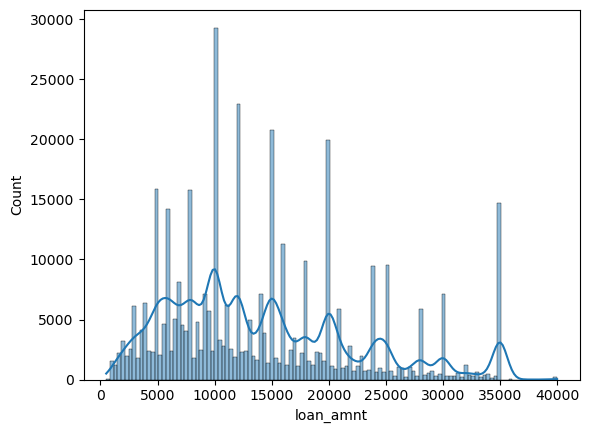

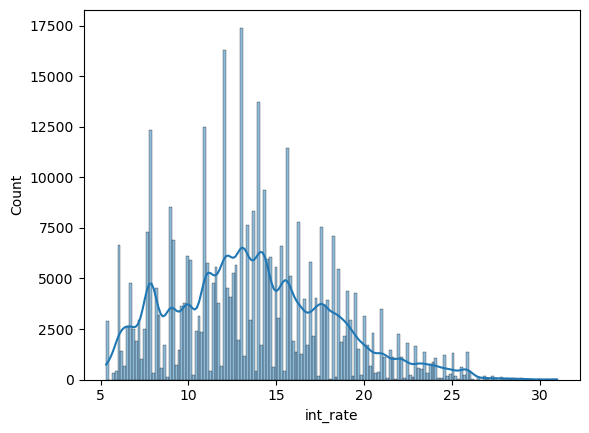

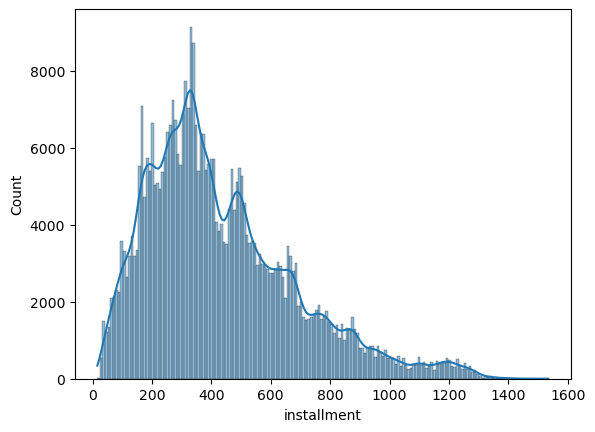

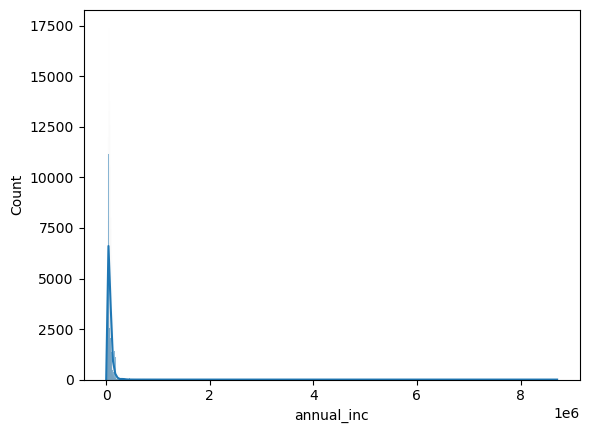

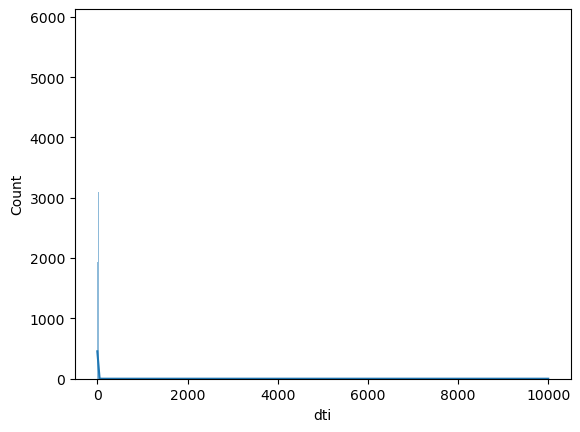

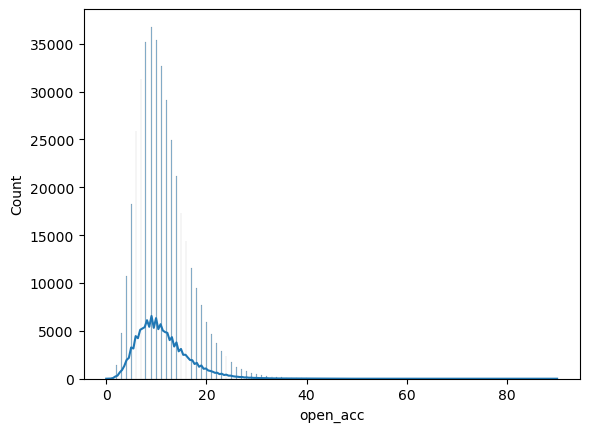

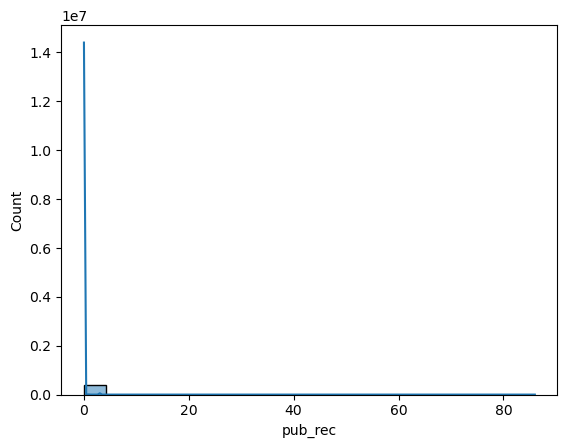

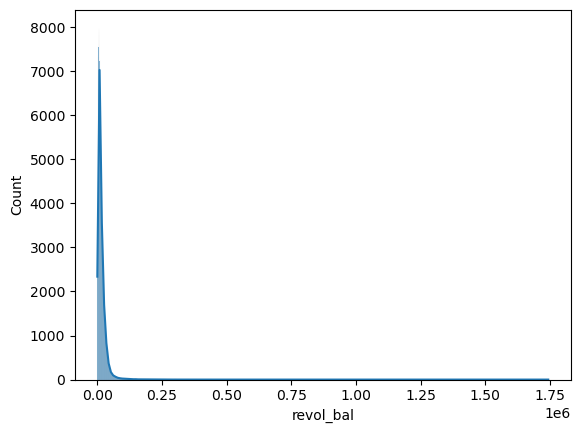

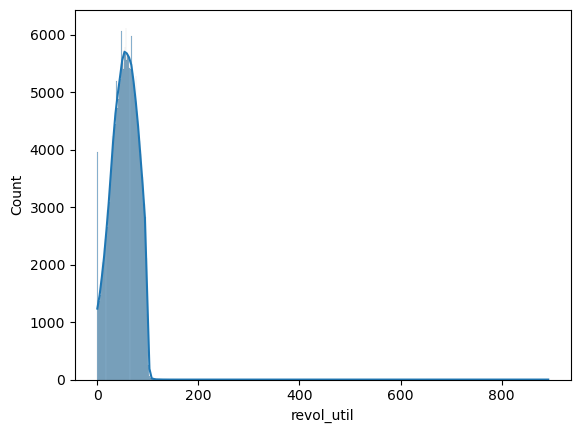

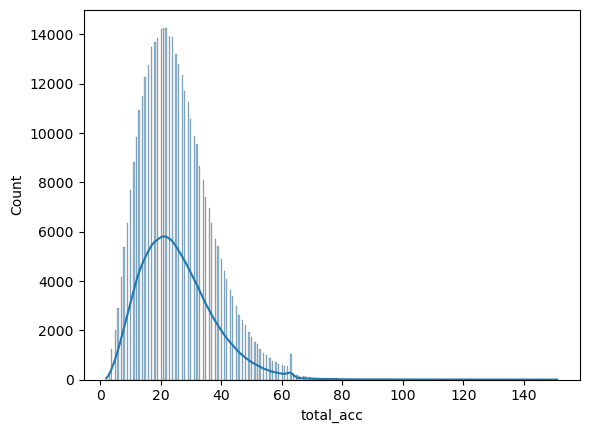

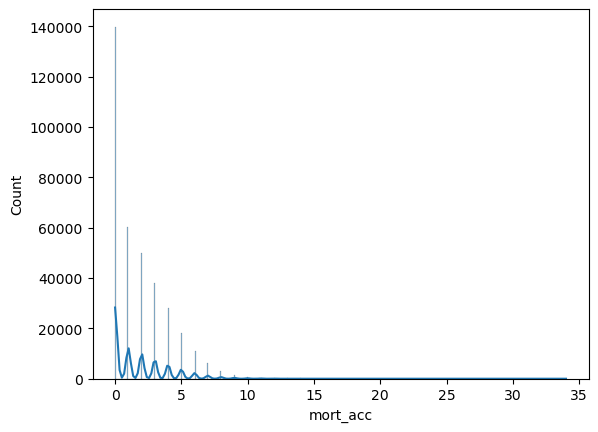

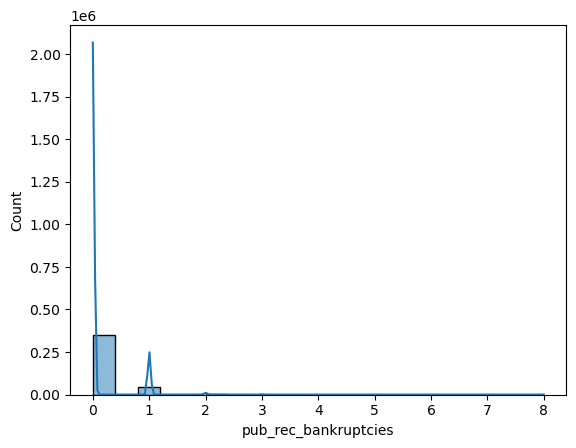

In [ ]:
plothist(df)

In [ ]:
df['loan_amnt'].describe()

count    396030.000000
mean      14113.888089
std        8357.441341
min         500.000000
25%        8000.000000
50%       12000.000000
75%       20000.000000
max       40000.000000
Name: loan_amnt, dtype: float64

- mean loan amount is 14,113
- 75 % loans are less than 20,000
- max loan amount is 40,000

In [ ]:
df['int_rate'].describe()

count    396030.000000
mean         13.639400
std           4.472157
min           5.320000
25%          10.490000
50%          13.330000
75%          16.490000
max          30.990000
Name: int_rate, dtype: float64

- mean int_rate is 13.6
- 75 % int_rate are less than 16.5
- max int_rate is 30.99

In [ ]:
df['installment'].describe()

count    396030.000000
mean        431.849698
std         250.727790
min          16.080000
25%         250.330000
50%         375.430000
75%         567.300000
max        1533.810000
Name: installment, dtype: float64

- mean installment is 431.8
- 75 % installment are less than 567
- max installment is 1533

In [ ]:
df['annual_inc'].describe()

count    3.960300e+05
mean     7.420318e+04
std      6.163762e+04
min      0.000000e+00
25%      4.500000e+04
50%      6.400000e+04
75%      9.000000e+04
max      8.706582e+06
Name: annual_inc, dtype: float64

- mean annual_inc is 74,203
- median annual_inci  is 64,000
- max annual_inc is 87,065

In [ ]:
df['dti'].describe()

count    396030.000000
mean         17.379514
std          18.019092
min           0.000000
25%          11.280000
50%          16.910000
75%          22.980000
max        9999.000000
Name: dti, dtype: float64

- mean dti is 17.3
- median dti  is 16.91

In [ ]:
df['open_acc'].describe()

count    396030.000000
mean         11.311153
std           5.137649
min           0.000000
25%           8.000000
50%          10.000000
75%          14.000000
max          90.000000
Name: open_acc, dtype: float64

- mean open_acc is 11.3
- median open_acc  is 10.0
- max open_acc  is 90.00

In [ ]:
df['pub_rec'].describe()

count    396030.000000
mean          0.178191
std           0.530671
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          86.000000
Name: pub_rec, dtype: float64

In [ ]:
df['pub_rec'].value_counts(normalize=True,sort=False,bins=[0,1,15]).round(4)*100

(-0.001, 1.0]    97.98
(1.0, 15.0]       2.02
Name: pub_rec, dtype: float64

- mean pub_rec is 0.178
- median pub_rec  is 0.0
- 98% of pub_rec is between 0 to 1

In [ ]:
df['revol_bal'].describe()

count    3.960300e+05
mean     1.584454e+04
std      2.059184e+04
min      0.000000e+00
25%      6.025000e+03
50%      1.118100e+04
75%      1.962000e+04
max      1.743266e+06
Name: revol_bal, dtype: float64

- mean revol_bal is 15,844
- median revol_bal  is 11,181
- max revol_bal is 17,432

In [ ]:
df['revol_util'].describe()

count    395754.000000
mean         53.791749
std          24.452193
min           0.000000
25%          35.800000
50%          54.800000
75%          72.900000
max         892.300000
Name: revol_util, dtype: float64

- mean revol_util is 53.79
- median revol_util  is 54.8

In [ ]:
df['total_acc'].describe()

count    396030.000000
mean         25.414744
std          11.886991
min           2.000000
25%          17.000000
50%          24.000000
75%          32.000000
max         151.000000
Name: total_acc, dtype: float64

- mean total_acc is 25.4
- median total_acc  is 24.0
- max total_acc is 151

In [ ]:
df['mort_acc'].describe()

count    358235.000000
mean          1.813991
std           2.147930
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          34.000000
Name: mort_acc, dtype: float64

- mean mort_acc is 1.8
- median mort_acc  is 1.0
- max mort_acc is 34

In [ ]:
df['pub_rec_bankruptcies'].describe()

count    395495.000000
mean          0.121648
std           0.356174
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: pub_rec_bankruptcies, dtype: float64

In [ ]:
df['pub_rec_bankruptcies'].value_counts(normalize=True,sort=False,bins=[0,1,15]).round(4)*100

(-0.001, 1.0]    99.28
(1.0, 15.0]       0.59
Name: pub_rec_bankruptcies, dtype: float64

In [ ]:
df['pub_rec_bankruptcies'].value_counts()

0.00    350380
1.00     42790
2.00      1847
3.00       351
4.00        82
5.00        32
6.00         7
7.00         4
8.00         2
Name: pub_rec_bankruptcies, dtype: int64

- mean pub_rec_bankruptcies is 0.12
- max pub_rec_bankruptcies is 8.0
- 99% pub_rec_bankruptcies  is between 0 to 1


### 1.2.2 Categorical Columns

In [ ]:
cat_cols

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [ ]:
def plotcat(df):
    '''
    function to plot histogram
    '''
    cat_cols=df.describe(include='string').columns
    for col in cat_cols:
         if df[col].nunique() < 200:
           sns.countplot(data=df,x=col)
           plt.xticks(rotation=60)
           plt.show()


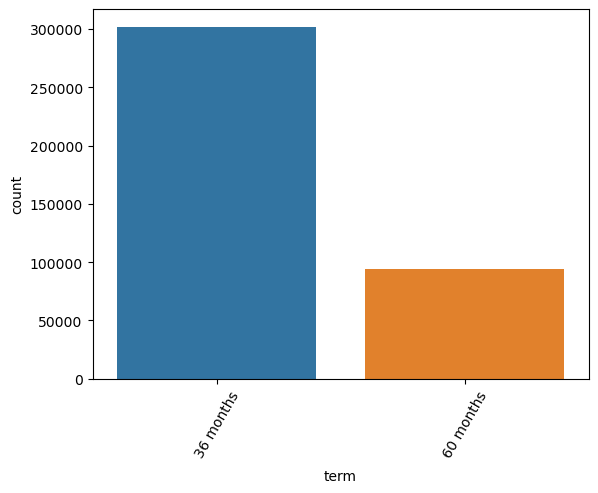

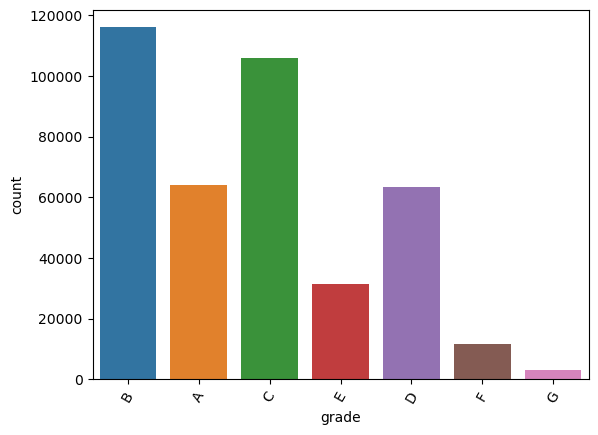

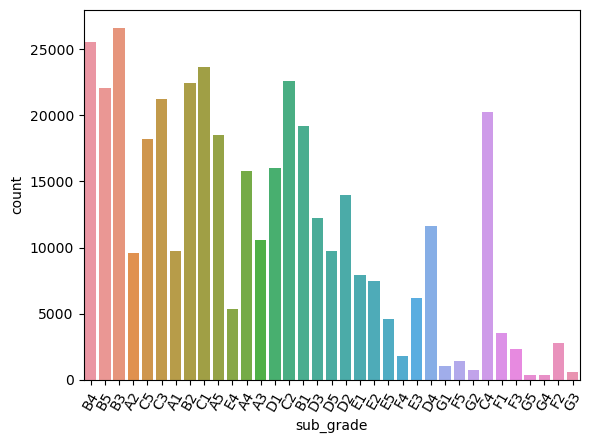

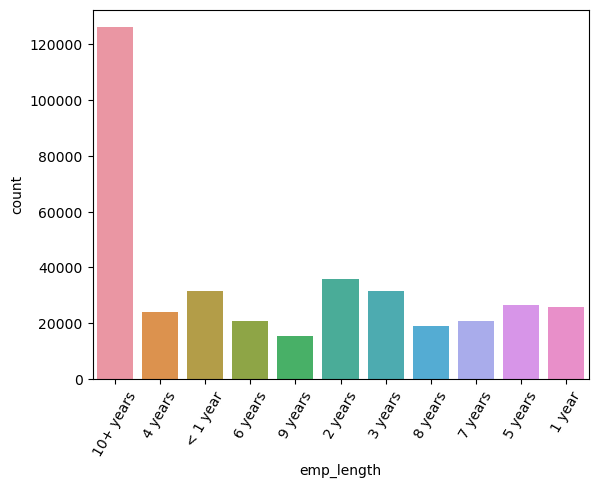

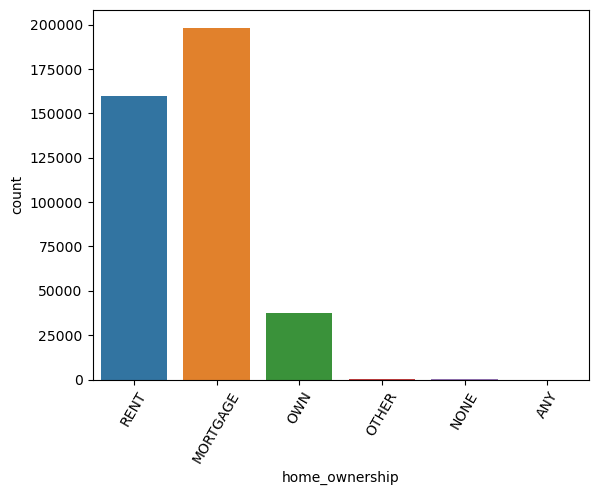

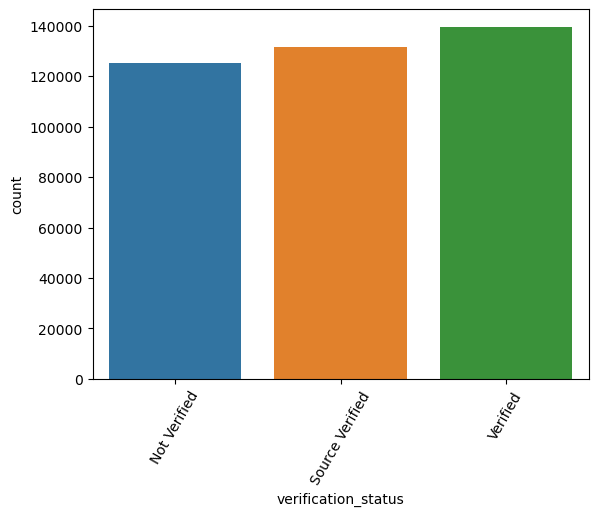

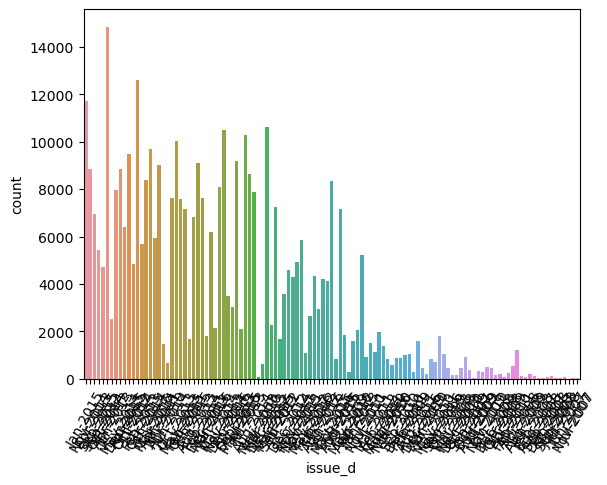

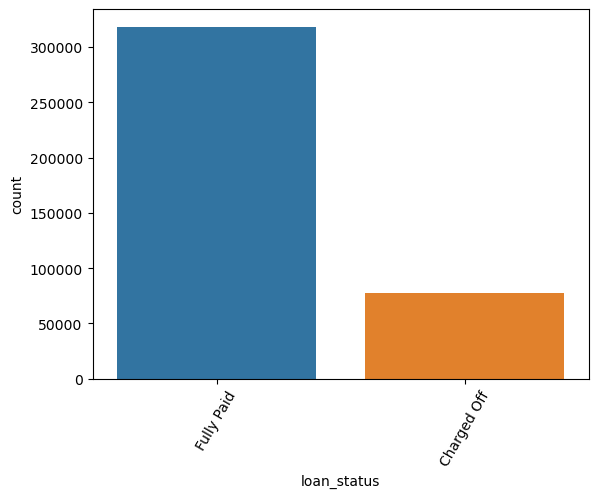

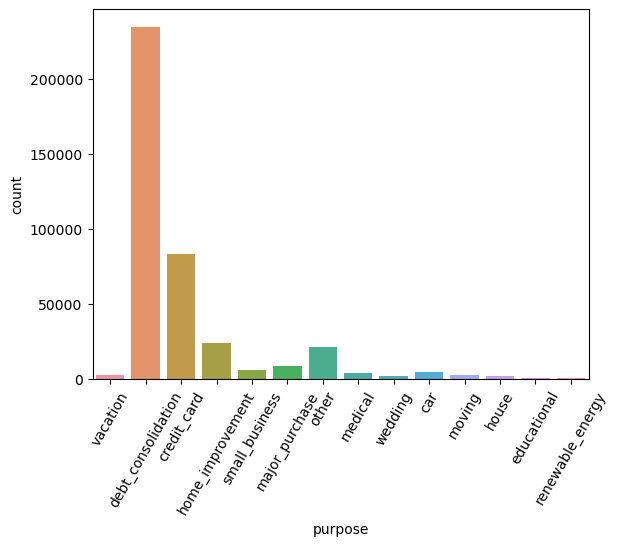

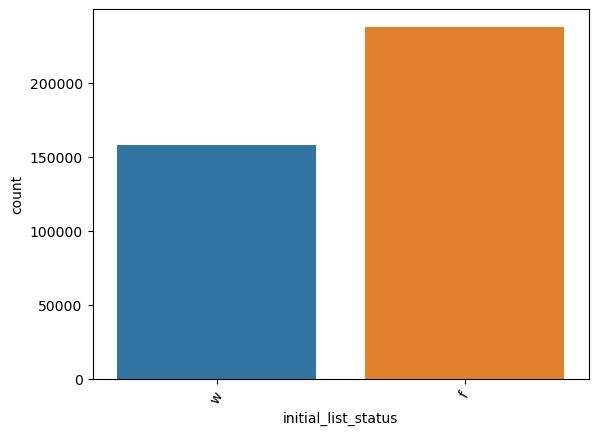

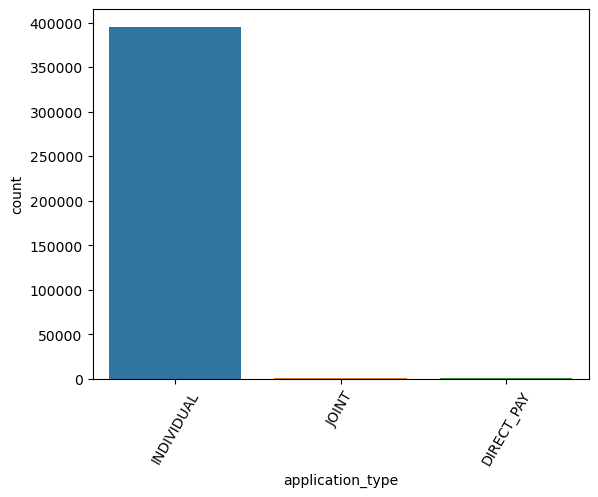

In [ ]:
 plotcat(df)

In [ ]:
df['term'].value_counts(normalize=True,sort=False).round(4)*100

36 months    76.26
60 months    23.74
Name: term, dtype: Float64

- 76% loans have term of 36 months
- 24% loans have term of 60 months

In [ ]:
df['grade'].value_counts(normalize=True,sort=False).round(4)*100

B     29.3
C    26.76
A    16.21
D    16.04
E     7.95
F     2.97
G     0.77
Name: grade, dtype: Float64

- top 4 grades are B,C,A,D


In [ ]:
df['sub_grade'].value_counts(normalize=True,sort=False).round(4)*100

B3    6.73
B4    6.46
C1    5.97
C2     5.7
B2    5.68
B5    5.58
C3    5.36
C4    5.12
B1    4.84
A5    4.68
C5    4.61
D1    4.04
A4    3.99
D2    3.52
D3    3.09
D4    2.94
A3    2.67
A1    2.46
D5    2.45
A2    2.42
E1     2.0
E2    1.88
E3    1.57
E4    1.35
E5    1.15
F1    0.89
F2     0.7
F3    0.58
F4    0.45
F5    0.35
G1    0.27
G2    0.19
G3    0.14
G4    0.09
G5    0.08
Name: sub_grade, dtype: Float64

- top 5 sub_grade are B3, B4, C1, C2, B2

In [ ]:
df['emp_title'].value_counts(normalize=True,sort=False).round(4)*100

Teacher                    1.18
Manager                    1.14
Registered Nurse            0.5
RN                         0.49
Supervisor                 0.49
                           ... 
Postman                     0.0
McCarthy & Holthus, LLC     0.0
jp flooring                 0.0
Histology Technologist      0.0
Gracon Services, Inc        0.0
Name: emp_title, Length: 173105, dtype: Float64

top 5 emp_titles are  
- Teacher                    
- Manager                   
- Registered Nurse            
- RN                        
- Supervisor  

In [ ]:
df['emp_length'].value_counts(normalize=True,sort=False).round(4)*100

10+ years    33.37
2 years       9.48
< 1 year       8.4
3 years       8.38
5 years       7.01
1 year        6.85
4 years       6.34
6 years       5.52
7 years       5.51
8 years       5.07
9 years       4.05
Name: emp_length, dtype: Float64

top 5 emp_length are  
- 10+ years    
- 2 years        
- < 1 year       
- 3 years      
- 5 years   

In [ ]:
df['home_ownership'].value_counts(normalize=True,sort=False).round(4)*100

MORTGAGE    50.08
RENT        40.35
OWN          9.53
OTHER        0.03
NONE         0.01
ANY           0.0
Name: home_ownership, dtype: Float64

top 3 home_ownership are  
- MORTGAGE     
- RENT        
- OWN           

In [ ]:
df['verification_status'].value_counts(normalize=True,sort=False).round(4)*100

Verified           35.24
Source Verified    33.18
Not Verified       31.58
Name: verification_status, dtype: Float64

top 3 verification_status are  
- Verified            
- Source Verified   
- Not Verified       

In [ ]:
df['issue_d'].value_counts(normalize=True,sort=False).round(4)*100

Oct-2014    3.75
Jul-2014    3.18
Jan-2015    2.96
Dec-2013    2.68
Nov-2013    2.65
            ... 
Jul-2007    0.01
Sep-2008    0.01
Nov-2007    0.01
Sep-2007     0.0
Jun-2007     0.0
Name: issue_d, Length: 115, dtype: Float64

In [ ]:
df['issue_d'].describe()

count       396030
unique         115
top       Oct-2014
freq         14846
Name: issue_d, dtype: object

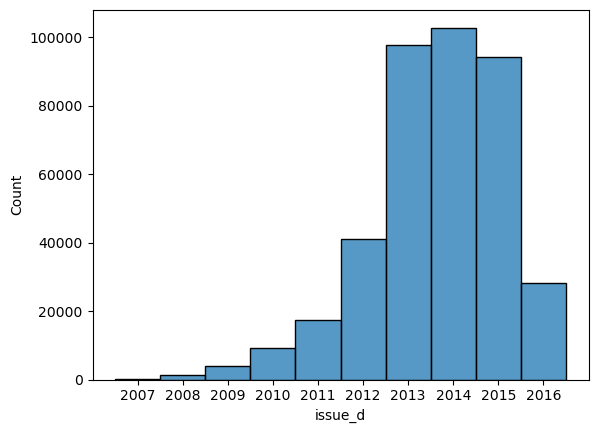

In [ ]:
iss=df['issue_d'].str.split('-').str[1]
sns.histplot(iss.sort_values())
plt.show()

top 5 issue_d are  
- Oct-2014    
- Jul-2014    
- Jan-2015   
- Dec-2013    
- Nov-2013     

In [ ]:
df['loan_status'].value_counts(normalize=True,sort=False).round(4)*100

Fully Paid     80.39
Charged Off    19.61
Name: loan_status, dtype: Float64

- 76% loans have term of 36 months
- 24% loans have term of 60 months

In [ ]:
df['purpose'].value_counts(normalize=True,sort=False).round(4)*100

debt_consolidation    59.21
credit_card           20.96
home_improvement       6.07
other                  5.35
major_purchase         2.22
small_business         1.44
car                    1.19
medical                1.06
moving                 0.72
vacation               0.62
house                  0.56
wedding                0.46
renewable_energy       0.08
educational            0.06
Name: purpose, dtype: Float64

top 5 purpose are  
- debt_consolidation    
- credit_card          
- home_improvement    
- other                  
- major_purchase       

In [ ]:
df['title'].value_counts(normalize=True,sort=False).round(4)*100

Debt consolidation            38.67
Credit card refinancing       13.06
Home improvement               3.87
Other                          3.28
Debt Consolidation             2.94
                              ...  
Graduation/Travel Expenses      0.0
Daughter's Wedding Bill         0.0
gotta move                      0.0
creditcardrefi                  0.0
Toxic Debt Payoff               0.0
Name: title, Length: 48817, dtype: Float64

top 5 title are  
- Debt consolidation          
- Credit card refinancing       
- Home improvement               
- Other                        
- Debt Consolidation    

In [ ]:
df['earliest_cr_line'].value_counts(normalize=True,sort=False).round(4)*100

Oct-2000    0.76
Aug-2000    0.74
Oct-2001    0.73
Aug-2001    0.73
Nov-2000    0.69
            ... 
Jul-1958     0.0
Nov-1957     0.0
Jan-1953     0.0
Jul-1955     0.0
Aug-1959     0.0
Name: earliest_cr_line, Length: 684, dtype: Float64

In [ ]:
cr=df['earliest_cr_line'].str.split('-').str[1]
cr

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: earliest_cr_line, Length: 396030, dtype: object

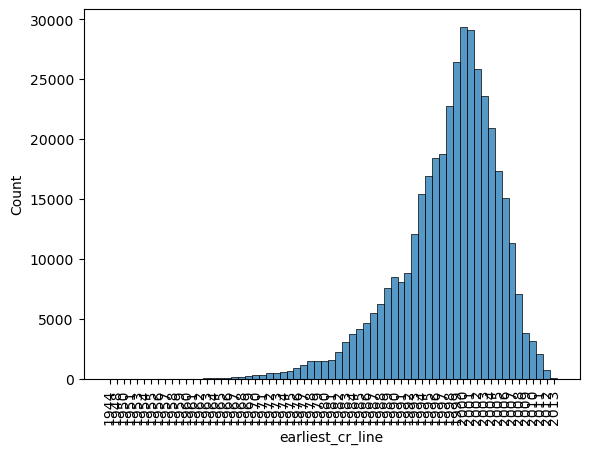

In [ ]:
cr=df['earliest_cr_line'].str.split('-').str[1]
sns.histplot(cr.sort_values())
plt.xticks(rotation=90)
plt.show()

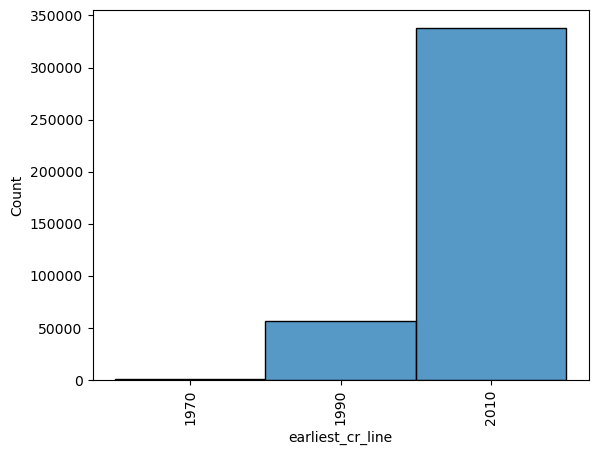

In [ ]:
bins = [1944,1970,1990,2013]
groups = ['1970','1990','2010']
cr_bin=pd.cut(cr.astype(int),bins,labels = groups)
sns.histplot(cr_bin.sort_values())
plt.xticks(rotation=90)
plt.show()

In [ ]:
cr.value_counts(normalize=True).round(4)*100

2000    7.42
2001    7.34
1999    6.69
2002    6.54
2003    5.97
        ... 
1951    0.00
1950    0.00
1953    0.00
1944    0.00
1948    0.00
Name: earliest_cr_line, Length: 65, dtype: float64

top 5 earliest_cr_line are  
- 2000    
- 2001    
- 1999   
- 2002    
- 2003     

In [ ]:
df['initial_list_status'].value_counts(normalize=True,sort=False).round(4)*100

f    60.11
w    39.89
Name: initial_list_status, dtype: Float64

- 60%   of initial_list_status is f
- 40%   of initial_list_status is w

In [ ]:
df['application_type'].value_counts(normalize=True,sort=False).round(4)*100

INDIVIDUAL    99.82
JOINT          0.11
DIRECT_PAY     0.07
Name: application_type, dtype: Float64

- 99.8%  of application_type is INDIVIDUAL
- 0.11%  of application_type is JOINT
- 007%   of application_type is DIRECT_PAY

In [ ]:
df['address'].value_counts(normalize=True,sort=False).round(4)*100

USCGC Smith
FPO AE 70466                           0.0
USS Johnson
FPO AE 48052                           0.0
USNS Johnson
FPO AE 05113                          0.0
USS Smith
FPO AP 70466                             0.0
USNS Johnson
FPO AP 48052                          0.0
                                                   ... 
455 Tricia Cove
Austinbury, FL 00813               0.0
7776 Flores Fall
Fernandezshire, UT 05113          0.0
6577 Mia Harbors Apt. 171
Robertshire, OK 22690    0.0
8141 Cox Greens Suite 186
Madisonstad, VT 05113    0.0
787 Michelle Causeway
Briannaton, AR 48052         0.0
Name: address, Length: 393700, dtype: Float64

-  address has no grouping

## 1.3 Bivariate Analysis

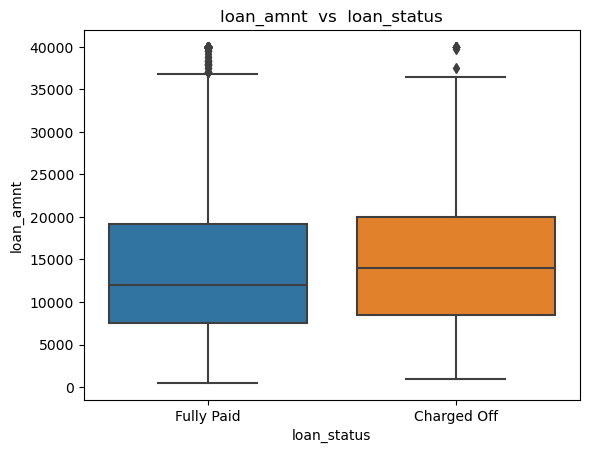

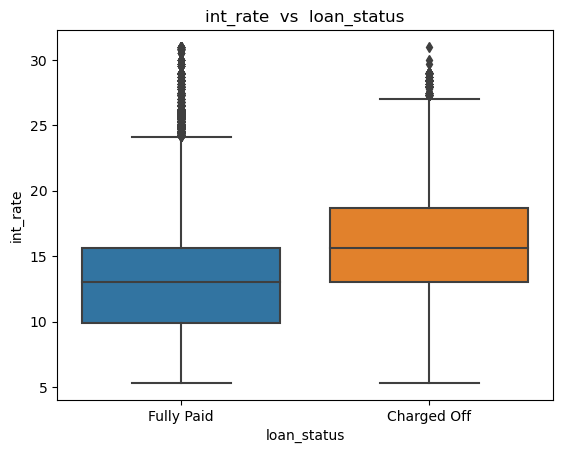

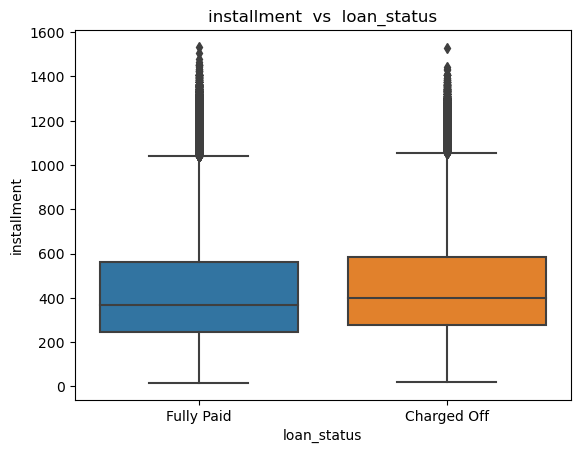

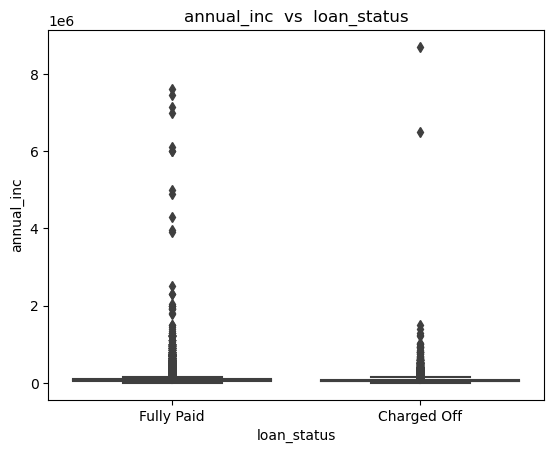

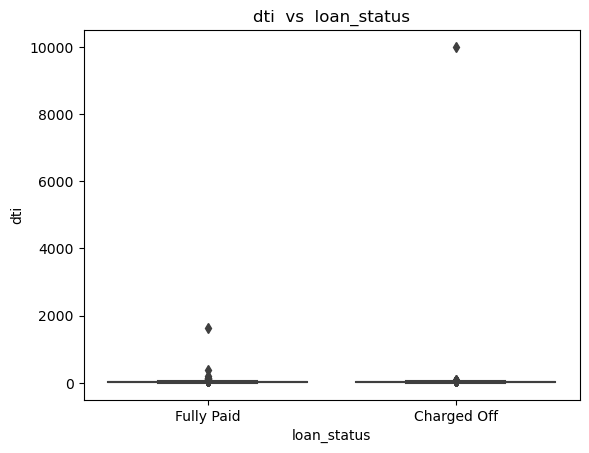

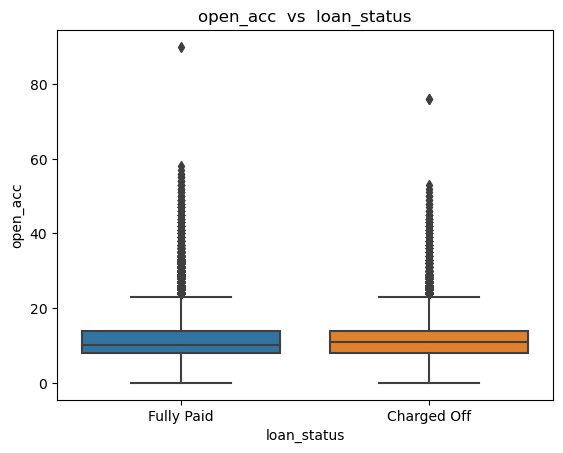

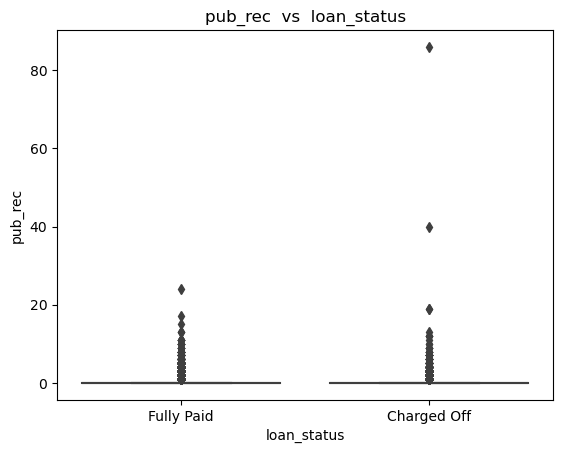

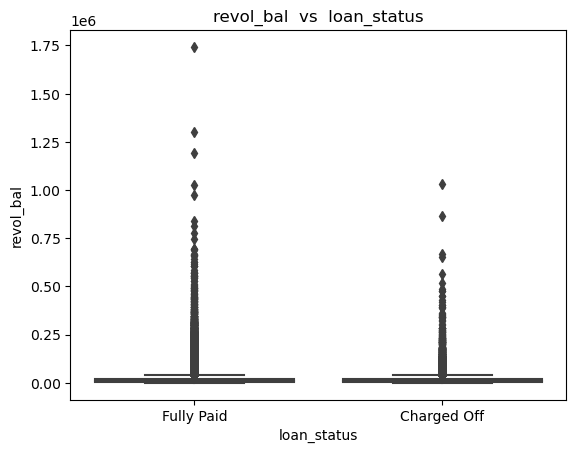

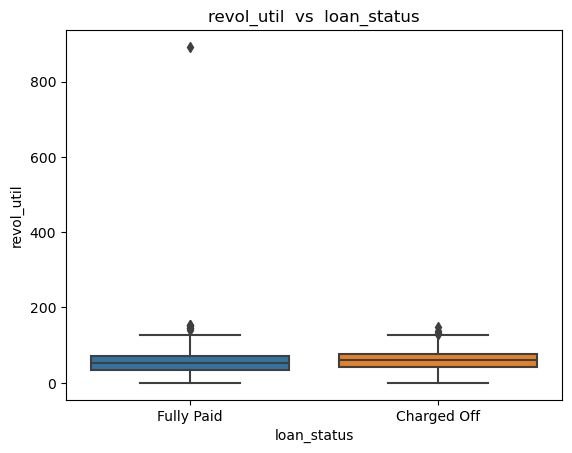

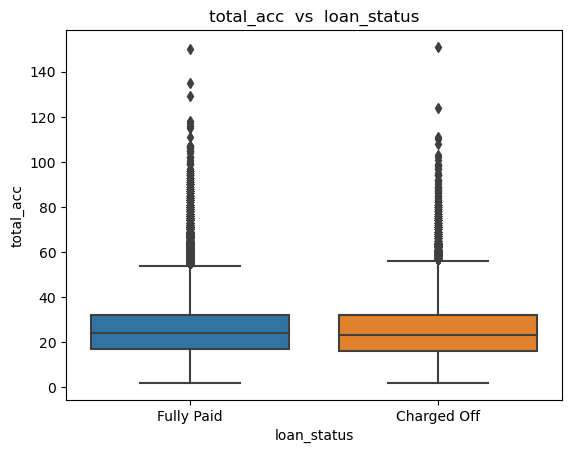

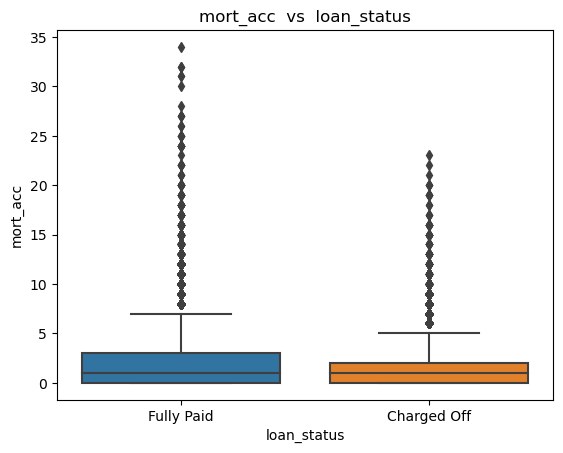

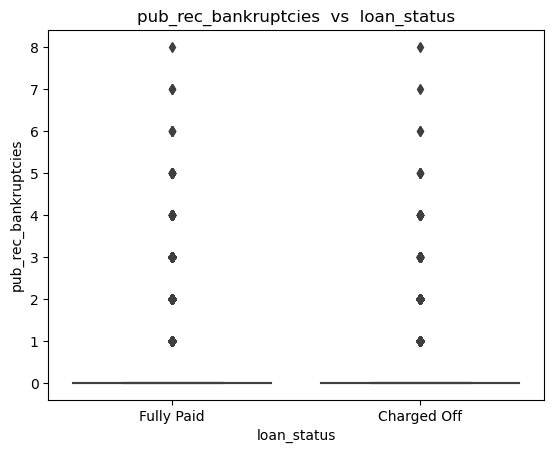

In [ ]:
for col in num_cols:
    sns.boxplot(data=df ,x= 'loan_status',y= col)
    plt.title(f"{col}  vs  loan_status")
    plt.show()

In [ ]:
def plotcat(df,c1,c2):
    #https://towardsdatascience.com/100-stacked-charts-in-python-6ca3e1962d2b
    tab = pd.crosstab(index=df[c1],columns=df[c2],normalize="index")
    tab.plot(kind='bar',stacked=True)
    plt.xlabel(c1)
    plt.show()


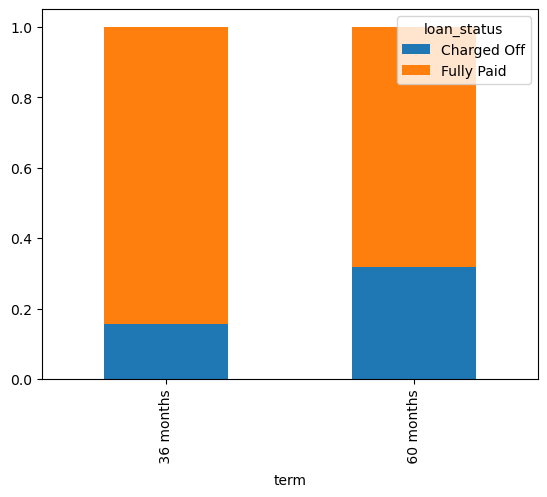

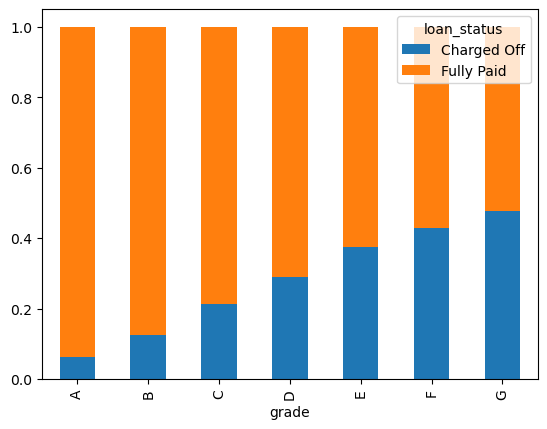

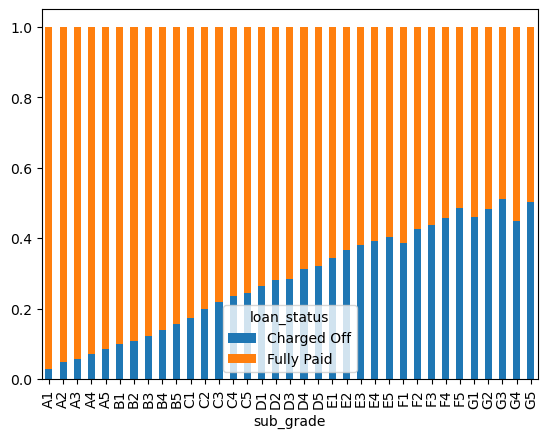

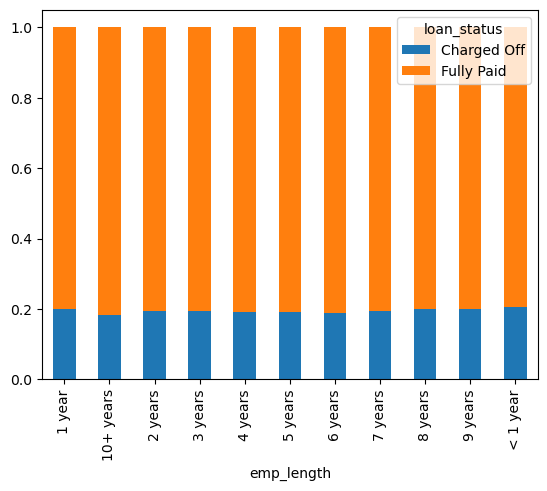

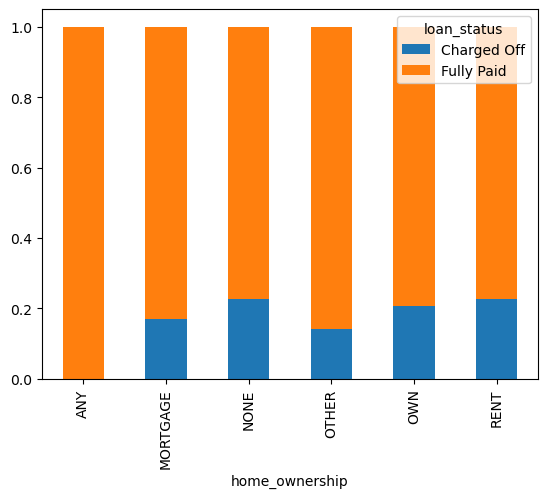

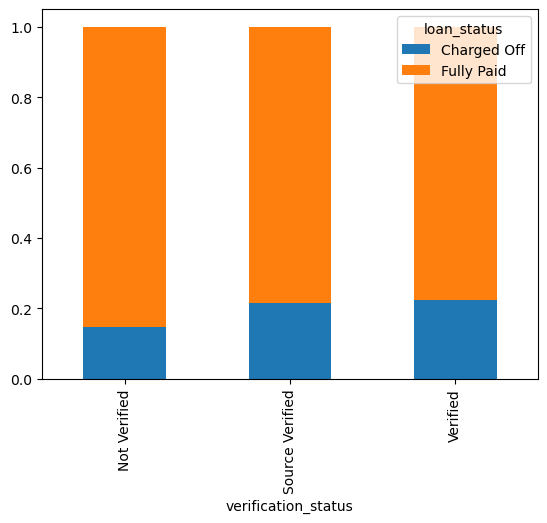

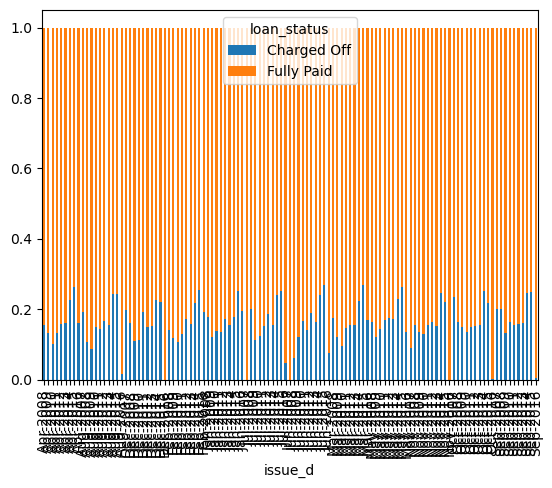

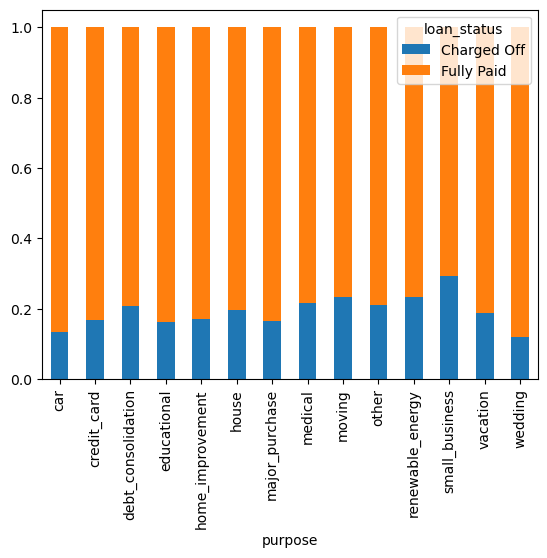

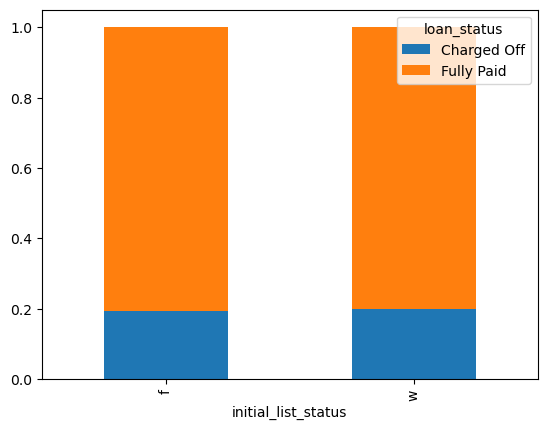

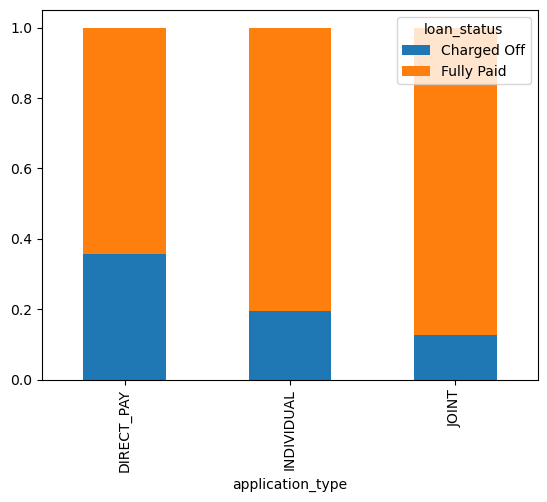

In [ ]:
for col in cat_cols:
    if col == 'loan_status':
        continue
    if df[col].nunique() < 200:
       plotcat(df,col,'loan_status')



## 1.4 Correlation Analysis

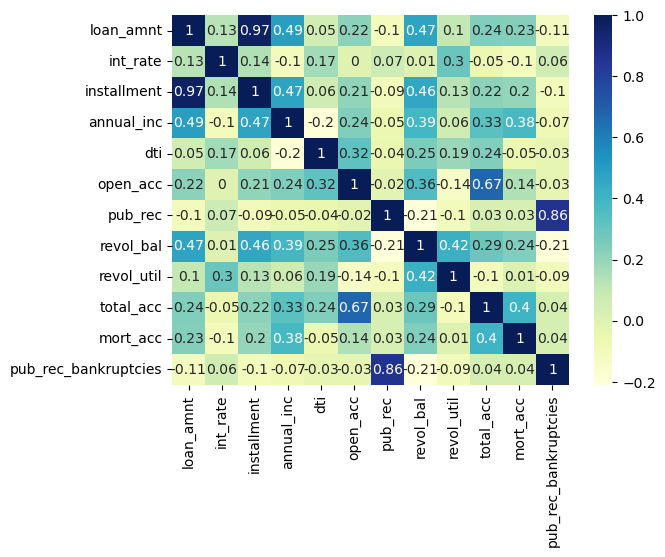

In [ ]:
# plotting correlation heatmap
dataplot = sns.heatmap(df.corr(method='spearman').round(2), cmap="YlGnBu", annot=True)

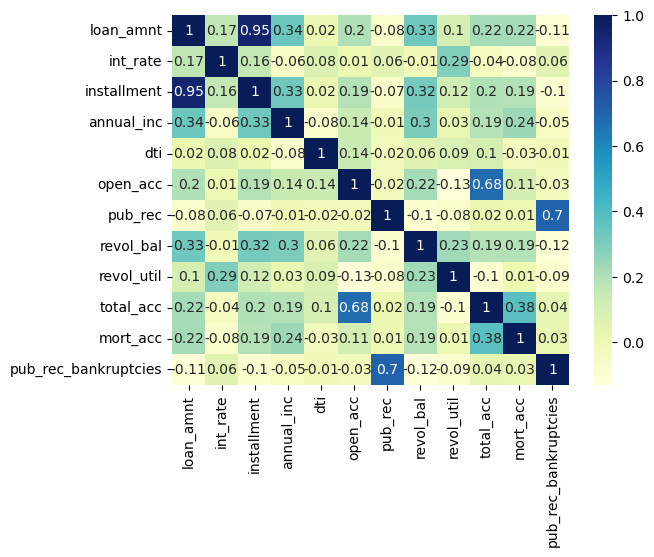

In [ ]:
# plotting correlation heatmap
dataplot = sns.heatmap(df.corr().round(2), cmap="YlGnBu", annot=True)

 - loan_amnt ,installment  are correlated
 - pub_rec ,pub_rec_bankruptcies  are correlated
 - open_acc ,total_acc  are correlated

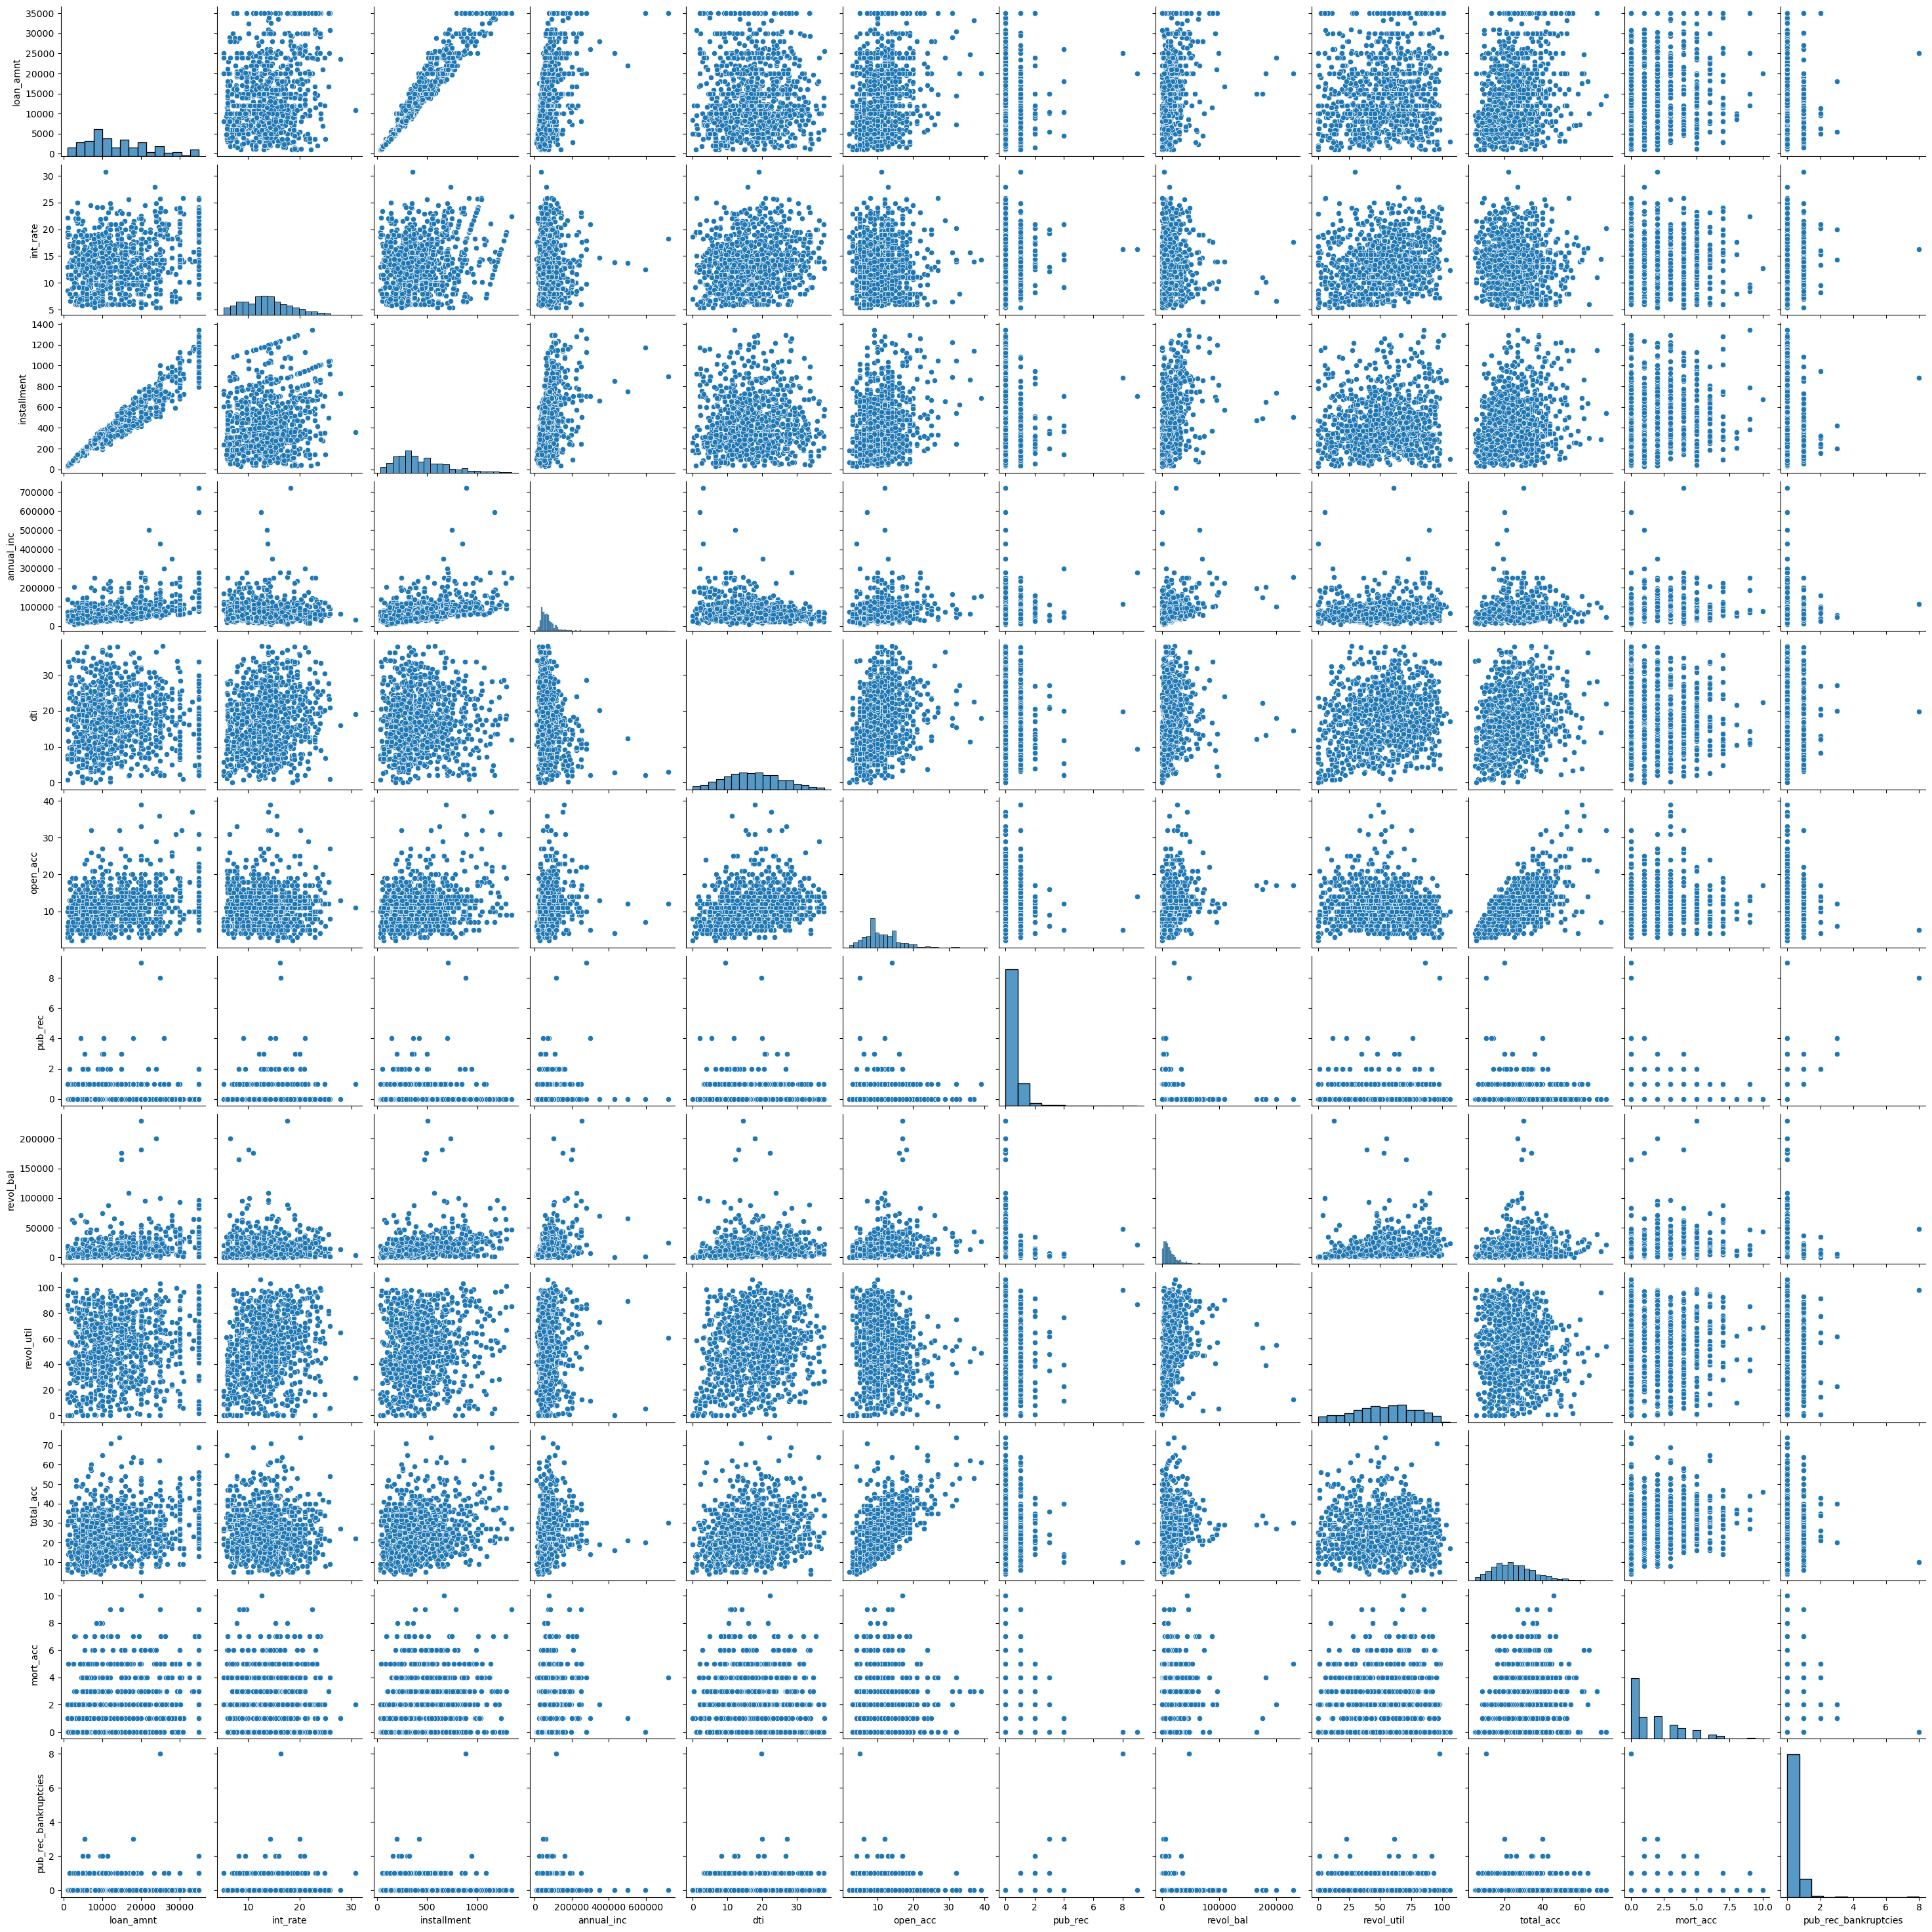

In [ ]:
sns.pairplot(df.sample(1000))
plt.show()

## 1.5 Outlier treatment

In [ ]:
def outlier(df, col):
    '''
    remove outliers using IQR
    '''
    #calculate q1,q3
    q1 = np.percentile(df[col],25)
    q3 = np.percentile(df[col],75)
    iqr = q3-q1
    #calculate high,low limit
    hl = q3+1.5*iqr
    ll = q1-1.5*iqr
    out = df[(df[col]>ll) & (df[col]<hl)]
    num= len(out)
    diff = len(df) - num
    cnt_per=(num*100)/len(df)
    print(f'col: {col} | filtered %: {round(100-cnt_per,2)}|outlier count:{diff}')
    return out

In [ ]:
for col in num_cols:
    outlier(df, col)

col: loan_amnt | filtered %: 0.05|outlier count:194
col: int_rate | filtered %: 0.95|outlier count:3777
col: installment | filtered %: 2.84|outlier count:11250
col: annual_inc | filtered %: 4.22|outlier count:16714
col: dti | filtered %: 0.07|outlier count:275
col: open_acc | filtered %: 3.35|outlier count:13251
col: pub_rec | filtered %: 100.0|outlier count:396030
col: revol_bal | filtered %: 5.37|outlier count:21259
col: revol_util | filtered %: 100.0|outlier count:396030
col: total_acc | filtered %: 2.15|outlier count:8499
col: mort_acc | filtered %: 100.0|outlier count:396030
col: pub_rec_bankruptcies | filtered %: 100.0|outlier count:396030


In [ ]:
def std_outlier(df, col):
    '''
    remove outliers using 3 sigma
    '''
    #calculate high,low limit
    hl = df[col].mean() + 3*df[col].std()
    ll = df[col].mean() - 3*df[col].std()
    out = df[(df[col]>ll) & (df[col]<hl)]
    num= len(out)
    diff = len(df) - num
    cnt_per=num*100/len(df)
    print(f'col: {col} | filtered %: {round(100-cnt_per,2)}|outlier count:{diff}')
    return out


In [ ]:
for col in num_cols:
    std_outlier(df, col)

col: loan_amnt | filtered %: 0.05|outlier count:185
col: int_rate | filtered %: 0.19|outlier count:756
col: installment | filtered %: 1.28|outlier count:5050
col: annual_inc | filtered %: 0.81|outlier count:3197
col: dti | filtered %: 0.0|outlier count:12
col: open_acc | filtered %: 1.23|outlier count:4879
col: pub_rec | filtered %: 2.02|outlier count:8019
col: revol_bal | filtered %: 1.21|outlier count:4790
col: revol_util | filtered %: 0.07|outlier count:292
col: total_acc | filtered %: 0.86|outlier count:3401
col: mort_acc | filtered %: 10.48|outlier count:41517
col: pub_rec_bankruptcies | filtered %: 0.72|outlier count:2860


- from above output we can observe that 3 sigma method for outliers is more effective  
- In logistic regresssion the sigmoid function inhibits effect of outlier. But presence of extreme outlier may hamper performance of logistic regression so outliers can be removed

# 2.0 Data Preprocessing

## 2.1 check for duplicates

In [ ]:
df.duplicated().sum()

0

## 2.2   Missing value Treatment

In [ ]:
# percentage of missing values in each column
round(100 * (df.isnull().sum()/len(df)),2).sort_values(ascending=False)

mort_acc               9.54
emp_title              5.79
emp_length             4.62
title                  0.44
pub_rec_bankruptcies   0.14
revol_util             0.07
loan_amnt              0.00
dti                    0.00
application_type       0.00
initial_list_status    0.00
total_acc              0.00
revol_bal              0.00
pub_rec                0.00
open_acc               0.00
earliest_cr_line       0.00
purpose                0.00
term                   0.00
loan_status            0.00
issue_d                0.00
verification_status    0.00
annual_inc             0.00
home_ownership         0.00
sub_grade              0.00
grade                  0.00
installment            0.00
int_rate               0.00
address                0.00
dtype: float64

In [ ]:
# for categorical columns replace nulls with tag 'unknown'
df['emp_length'].fillna("unknown", inplace=True)

# revol_util is normally distributed,so replace missing values with mean
df['revol_util'] = df['revol_util'].fillna(df['revol_util'].mean())

print(df['pub_rec_bankruptcies'].value_counts())

# replace missing vlaues with 0.0 ,most frequent value
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(0)
print('='*30)
print(df['mort_acc'].value_counts())

# replace missing vlaues with 0.0 ,most frequent value
df['mort_acc'] = df['mort_acc'].fillna(0)

0.00    350380
1.00     42790
2.00      1847
3.00       351
4.00        82
5.00        32
6.00         7
7.00         4
8.00         2
Name: pub_rec_bankruptcies, dtype: int64
0.00     139777
1.00      60416
2.00      49948
3.00      38049
4.00      27887
5.00      18194
6.00      11069
7.00       6052
8.00       3121
9.00       1656
10.00       865
11.00       479
12.00       264
13.00       146
14.00       107
15.00        61
16.00        37
17.00        22
18.00        18
19.00        15
20.00        13
24.00        10
22.00         7
21.00         4
25.00         4
27.00         3
32.00         2
31.00         2
23.00         2
26.00         2
28.00         1
30.00         1
34.00         1
Name: mort_acc, dtype: int64


In [ ]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length                  0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                  0
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                    0
pub_rec_bankruptcies        0
address                     0
dtype: int64

## 2.3  Feature Engineering

Following fields can be removed from the dataset
- emp_title: This field has high cardinality. due to this its impact on loan approval is not significant    
- title : This field has high cardinality. due to this its impact on loan approval is not significant
- issue_d : this field is not relevant for loan approval
- address : this field is not relevant for loan approval
- installment : delete this fiels to avoid multi-collinearity with loan_amnt

In [ ]:
# extract state from address
#https://stackoverflow.com/questions/25900332/find-last-word-in-a-string-within-a-list-pandas-python-3
df['address_st'] =df["address"].str.split().str[-2].astype('string')

In [ ]:
# delete columns not required by the model
df.drop(['emp_title', 'title','issue_d', 'address', 'installment'], axis=1, inplace=True)

print(f'mort_acc counts before pre-process' )
print(df['mort_acc'].value_counts())
print('='*30)
print(f'pub_rec counts before pre-process' )
print(df['pub_rec'].value_counts())
print('='*30)
print(f'pub_rec_bankruptcies counts before pre-process' )
print(df['pub_rec_bankruptcies'].value_counts())

mort_acc counts before pre-process
0.00     177572
1.00      60416
2.00      49948
3.00      38049
4.00      27887
5.00      18194
6.00      11069
7.00       6052
8.00       3121
9.00       1656
10.00       865
11.00       479
12.00       264
13.00       146
14.00       107
15.00        61
16.00        37
17.00        22
18.00        18
19.00        15
20.00        13
24.00        10
22.00         7
21.00         4
25.00         4
27.00         3
32.00         2
31.00         2
23.00         2
26.00         2
28.00         1
30.00         1
34.00         1
Name: mort_acc, dtype: int64
pub_rec counts before pre-process
0.00     338272
1.00      49739
2.00       5476
3.00       1521
4.00        527
5.00        237
6.00        122
7.00         56
8.00         34
9.00         12
10.00        11
11.00         8
13.00         4
12.00         4
19.00         2
40.00         1
17.00         1
86.00         1
24.00         1
15.00         1
Name: pub_rec, dtype: int64
pub_rec_bankruptcies count

In [ ]:
def col_process(in_data):
    if in_data == 0:
        return 0
    if in_data > 1:
        return 1
    else:
        return in_data

df['pub_rec'] = df['pub_rec'].apply(col_process)
df['mort_acc'] = df['mort_acc'].apply(col_process)
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].apply(col_process)

print(f'mort_acc counts after pre-process' )
print(df['mort_acc'].value_counts())
print('='*30)
print(f'pub_rec counts after pre-process' )
print(df['pub_rec'].value_counts())
print('='*30)
print(f'pub_rec_bankruptcies counts after pre-process' )
print(df['pub_rec_bankruptcies'].value_counts())

mort_acc counts after pre-process
1.00    218458
0.00    177572
Name: mort_acc, dtype: int64
pub_rec counts after pre-process
0.00    338272
1.00     57758
Name: pub_rec, dtype: int64
pub_rec_bankruptcies counts after pre-process
0.00    350915
1.00     45115
Name: pub_rec_bankruptcies, dtype: int64


In [ ]:
# extract year from earliest_cr_line
df['earliest_cr_line_yr']=df['earliest_cr_line'].str.split('-').str[1]
df['earliest_cr_line_yr']= df['earliest_cr_line_yr'].astype('int')

df.drop(['earliest_cr_line'], axis=1, inplace=True)

## 2.4   Outlier treatment

In [ ]:
old_len = len(df)

# extract numeric columns
num_cols= df.describe(include='float64').columns

for col in num_cols:
    df=std_outlier(df, col)

print(f'new shape after outlier removal:{df.shape}')
print(f'% of data removed:{100- (df.shape[0]*100/old_len)}')
print(f'outlier removal count:{old_len -df.shape[0]}')

col: loan_amnt | filtered %: 0.0|outlier count:0
col: int_rate | filtered %: 0.01|outlier count:51
col: annual_inc | filtered %: 0.8|outlier count:3179
col: dti | filtered %: 0.0|outlier count:11
col: open_acc | filtered %: 1.22|outlier count:4763
col: pub_rec | filtered %: 0.0|outlier count:0
col: revol_bal | filtered %: 1.35|outlier count:5215
col: revol_util | filtered %: 0.0|outlier count:15
col: total_acc | filtered %: 0.77|outlier count:2937
col: mort_acc | filtered %: 0.0|outlier count:0
col: pub_rec_bankruptcies | filtered %: 0.0|outlier count:0
new shape after outlier removal:(378920, 23)
% of data removed:4.0929811106808245
outlier removal count:16171


## 2.5 Data preparation

## 2.5.1 separate into independent & dependent data¶

In [ ]:
# remove loan_status since it not required for modelling
X = df.drop('loan_status', axis=1)
Y = df[['loan_status']]

## 2.5.2 split data into Train ,Test

In [ ]:
Y.value_counts(normalize=True)*100

loan_status
Fully Paid    80.35
Charged Off   19.65
dtype: float64

- Above counts shows classes are imbalanced,so we should use stratify for test,train split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state = 42, stratify=Y)

## 2.6 Feature Encoding & Scaling

In [ ]:
le_y=LabelEncoder()

y_train=le_y.fit_transform(y_train)
y_test=le_y.transform(y_test)

/home/ramapriya/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ramapriya/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# X_train:  Encode & Scale

cat_cols= X_train.describe(include='string').columns

#https://stephenallwright.com/label-encode-multiple-columns-dataframe/
#create label encoder for each categorical column
encoders = {}
for col in cat_cols:
    le = LabelEncoder().fit(X_train[col])
    X_train[col] = le.transform(X_train[col])
    encoders[col] = le

mmscaler = MinMaxScaler()
X_train[num_cols] = mmscaler.fit_transform(X_train[num_cols])

In [ ]:
# X_test:Encode & Scale

for col in cat_cols:
    le = encoders.get(col)
    X_test[col] = le.transform(X_test[col])

X_test[num_cols] = mmscaler.transform(X_test[num_cols])

# 3.0 Model building

In [ ]:
logreg = LogisticRegression(max_iter=300)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=300)

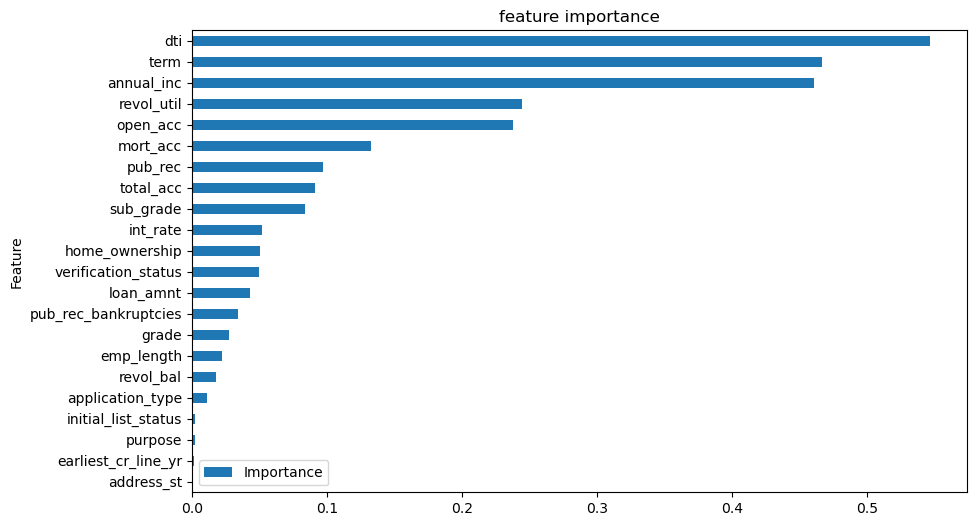

In [ ]:
#https://forecastegy.com/posts/feature-importance-in-logistic-regression/
coefficients = logreg.coef_[0]
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))
plt.title("feature importance")
plt.show()

The top 5 features of the model are      
- dti
- term	  
- annual_inc
- revol_util
- open_acc

In [ ]:
log_sm=sm.Logit(y_train,X_train)

In [ ]:
result=log_sm.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.451340
         Iterations 6
                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.089      
Dependent Variable:  y                 AIC:               239474.4828
Date:                2023-06-26 11:40  BIC:               239705.2278
No. Observations:    265244            Log-Likelihood:    -1.1972e+05
Df Model:            21                LL-Null:           -1.3143e+05
Df Residuals:        265222            LLR p-value:       0.0000     
Converged:           1.0000            Scale:             1.0000     
No. Iterations:      6.0000                                          
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
loan_amnt            -0.5446   0.0333 -16.3664 0.0000 -0.6098 -0.4794
term            

The following features have p-value > 0.05   and hence can  be removed  

| Feature | p-value |   
| --- | --- |
|	initial_list_status 	|	0.9978
|	mort_acc	|	0.679
|	grade	|	0.2624
|	address_st    	|	0.1831
|	application_type   	|	0.1349




# 4.0 Results Evaluation

## 4.1 Confusion Matrix

[[ 1495 20840]
 [ 1383 89958]]


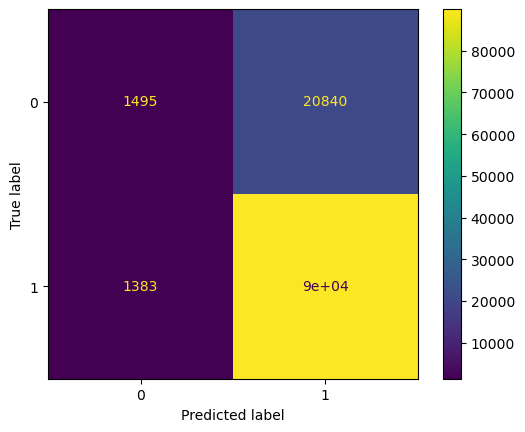

In [ ]:
y_pred = logreg.predict(X_test)

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

disp=ConfusionMatrixDisplay(confusion_matrix,display_labels=logreg.classes_)
disp.plot()
plt.show()

In [ ]:
# Finding accuracy, precision and recall
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)
precision = precision_score(y_test, y_pred)
print("Precision :", precision)
recall = recall_score(y_test, y_pred)
print("Recall    :", recall)

Accuracy   : 0.8045057883810127
Precision : 0.8119099622736873
Recall    : 0.9848589351988701


**Confusion Matrix**    
 matrix to display performance of classification model

**Elements of Confusion Matrix**
- TP: True Positive:  positive values correctly predicted positive.
- FP: False Positive: negative values falsely   predicted as positive.(Type I Error)
- FN: False Negative: positive values falsely   predicted as negative.(Type II Error)
- TN: True Negative:  negative values correctly predicted negative  

  
For ideal classifier FP=FN=0   

## 4.2 Classification Report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.07      0.12     22335
           1       0.81      0.98      0.89     91341

    accuracy                           0.80    113676
   macro avg       0.67      0.53      0.50    113676
weighted avg       0.75      0.80      0.74    113676



**Classification Report**   
displays model’s precision, recall, F1 score and support. It provides a better understanding of overall model performance   
precision : accuracy of model’s positive predictions  
recall : effectiveness of finding all relevant instances of a class in a data set    
F1 Score : weighted harmonic mean of precision and recall   
support : number of actual occurrences of the class in the dataset.

For ideal classifier precision=recall=1.0   

## 4.3 ROC-AUC Curve

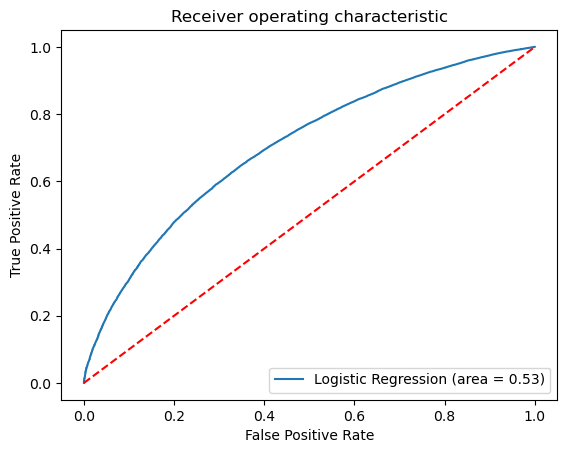

In [ ]:
# get AUC value for model
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))

#https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
#plot roc curve
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

- ROC curve, ( “receiver operating characteristic”) is a plot that displays the sensitivity and specificity of a logistic regression model for different thresholds.   
- AUC-ROC metric tell us about the capability of a model in distinguishing the classes.
- AUC (area under the curve) tells how much of the plot is located under the curve.



For this model AUC = 0.53 which is on lower side. The model performance can be improved further by
- Feature Engineering: using better features
- Improve class balance; using oversampling techniques like SMOTE
- Regualization: using optimal regulariation can improve model preformance

## 4.4 Precision-Recall Curve

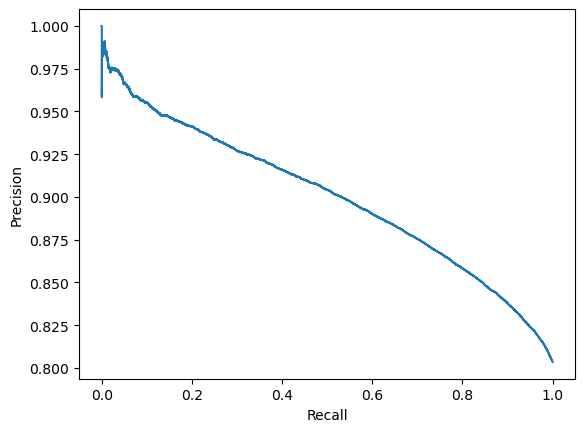

In [ ]:
y_pred_prob = logreg.predict_proba(X_test)[:,1]

precision, recall, threshold = precision_recall_curve(y_test,
                                                      y_pred_prob)
prd = PrecisionRecallDisplay(precision, recall)
prd.plot()
plt.show()

- precision-recall curve shows the tradeoff between precision and recall for different thresholds.   
- It is often used in situations where classes are heavily imbalanced.
- As recall increases, precision decreases,This represents the tradeoff between the two metrics.  

Using PR curve for required & precision,recall value we can decide a threshold.


**PR curve advantages**  
-  P-R curve provides more meaningful insights about the class of interest as compared to ROC curve
- another major drawback of ROC curve is its immunity to imbalanced data

# 5.0  Tradeoff Questions:

1) How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it.

1a) To keep very less False Positives, oversampling techniques like SMOTE should be used in model creation.This will reduce effect of class imbalance. Also we can use more complex algorithms like SVM, Decision-Trees, Random Forest and also try various hyperparameter tunning. data shows  that percentage of defaulters is slightly higher than Banking industry.



2) Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone

2a) Loan company should be very careful while disbursing loan.The company policy should be framed such that loan is disbursed to correct people.This can help in reducing current 20% defaulters

The defaulters count can be kpet less by choosing models with high precision. THis will keep false positives low. Choosing high presion will recude recall value due to trade-off. This can cause loans for good customers to be rejected